In [1]:
import torch
import torch.nn as nn
import random
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import os
import numpy as np
import pandas as pd
from os.path import join
from typing import Optional
from tqdm.notebook import tqdm
from scipy.stats import wasserstein_distance 
from matplotlib import pyplot as plt
import threading, concurrent
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer, execute

# Dataset

In [2]:

sys.path.append('../')

class DatasetImages(Dataset): #
    def __init__(self, data_type: str = 'train'):
        with open('../data/images.npy', 'rb') as f:
            images = np.load(f)
        with open('../data/labels.npy', 'rb') as f:
            labels = np.load(f)

        # Scale the images to be between 0 and 2pi TODO: Chcek
        images = (images - images.min()) / (images.max() - images.min()) * 2 * np.pi

        # Convert to numpy
        images = np.array(images, dtype=np.float32)
        labels = np.array(labels, dtype=np.float32)


        # images shape must be (n_samples, -1)
        #images = images.reshape(images.shape[0], -1)


        # Split the data into train and validation
        n_train = int(0.8 * len(images))
        n_val = len(images) - n_train

        if data_type == 'train':
            images = images[:n_train]
            labels = labels[:n_train]
        elif data_type == 'val':
            images = images[n_train:]
            labels = labels[n_train:]

        self.n_samples = len(images)
        self.images = images
        self.labels = labels


        # Print shapes DEBUG
        print(f"Type: {data_type}")
        print(f"Images shape: {self.images.shape}")
        print(f"Labels shape: {self.labels.shape}")



    def __getitem__(self, index):
        return torch.from_numpy(self.images)[index], torch.from_numpy(self.labels)[index]

    def __len__(self):
        return self.n_samples
        
    def all_items(self):
        return torch.from_numpy(self.images), torch.from_numpy(self.labels)


## Testing out Part 1

In [3]:
from part1 import run_part1

In [19]:
dataset_train = DatasetImages('train')

Type: train
Images shape: (1600, 28, 28)
Labels shape: (1600,)


In [5]:
images, labels = dataset_train.all_items()

In [6]:
image = images[0].numpy()
image.shape

(28, 28)

In [7]:
circuit, image = run_part1(image)

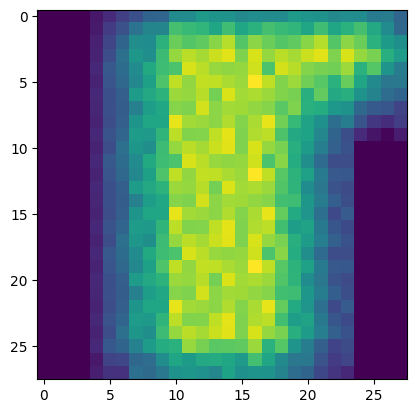

In [8]:
plt.imshow(image)

In [9]:
circuit.draw()

┌────────────┐ ┌─┐                                             
 q0_0: ──┤ Ry(1.0793) ├─┤M├─────────────────────────────────────────────
         ├────────────┤ └╥┘┌─┐                                          
 q0_1: ──┤ Ry(2.7398) ├──╫─┤M├──────────────────────────────────────────
         ├────────────┤  ║ └╥┘┌─┐                                       
 q0_2: ──┤ Ry(2.7099) ├──╫──╫─┤M├───────────────────────────────────────
        ┌┴────────────┤  ║  ║ └╥┘┌─┐                                    
 q0_3: ─┤ Ry(0.98365) ├──╫──╫──╫─┤M├────────────────────────────────────
        └┬────────────┤  ║  ║  ║ └╥┘┌─┐                                 
 q0_4: ──┤ Ry(1.2218) ├──╫──╫──╫──╫─┤M├─────────────────────────────────
         ├────────────┤  ║  ║  ║  ║ └╥┘┌─┐                              
 q0_5: ──┤ Ry(2.3494) ├──╫──╫──╫──╫──╫─┤M├──────────────────────────────
         ├────────────┤  ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q0_6: ──┤ Ry(2.5069) ├──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
         ├────────────┤  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q0_7: ──┤ Ry(1.2337) ├──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
       ┌─┴────────────┴┐ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q0_8: ┤ Ry(0.0039666) ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
       └─┬────────────┬┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q0_9: ──┤ Ry(2.9362) ├──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
         ├────────────┤  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q0_10: ──┤ Ry(3.0494) ├──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
       ┌─┴────────────┴┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q0_11: ┤ Ry(0.0035387) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
       ├───────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q0_12: ┤ Ry(0.0048344) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
       └─┬────────────┬┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q0_13: ──┤ Ry(3.0203) ├──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         └─┬───────┬──┘  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q0_14: ────┤ Ry(π) ├─────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
       ┌───┴───────┴───┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q0_15: ┤ Ry(0.0053292) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
       └───────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c0: 16/══════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                         0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

## VQC - Classifier

In [10]:
# Remove mesurements
circuit = circuit.remove_final_measurements(inplace=False)
circuit.draw()

┌────────────┐ 
 q0_0: ──┤ Ry(1.0793) ├─
         ├────────────┤ 
 q0_1: ──┤ Ry(2.7398) ├─
         ├────────────┤ 
 q0_2: ──┤ Ry(2.7099) ├─
        ┌┴────────────┤ 
 q0_3: ─┤ Ry(0.98365) ├─
        └┬────────────┤ 
 q0_4: ──┤ Ry(1.2218) ├─
         ├────────────┤ 
 q0_5: ──┤ Ry(2.3494) ├─
         ├────────────┤ 
 q0_6: ──┤ Ry(2.5069) ├─
         ├────────────┤ 
 q0_7: ──┤ Ry(1.2337) ├─
       ┌─┴────────────┴┐
 q0_8: ┤ Ry(0.0039666) ├
       └─┬────────────┬┘
 q0_9: ──┤ Ry(2.9362) ├─
         ├────────────┤ 
q0_10: ──┤ Ry(3.0494) ├─
       ┌─┴────────────┴┐
q0_11: ┤ Ry(0.0035387) ├
       ├───────────────┤
q0_12: ┤ Ry(0.0048344) ├
       └─┬────────────┬┘
q0_13: ──┤ Ry(3.0203) ├─
         └─┬───────┬──┘ 
q0_14: ────┤ Ry(π) ├────
       ┌───┴───────┴───┐
q0_15: ┤ Ry(0.0053292) ├
       └───────────────┘

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [29]:
qc = QuantumCircuit(2)

In [ ]:
# Apply a rotation gate that has 3 parameters
qc.rx(0.1, 0)
qc.rx(0.2, 1)


In [30]:
class VQC(nn.Module):
    def __init__(self):
        super().__init__()
        self.num_qubits = 16
        self.depth = 2
        self.thetas = nn.Parameter(torch.zeros(self.num_qubits, self.depth, 3))
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)

    def forward(self, x):
        qc = QuantumCircuit(self.num_qubits)

        # Layers
        for layer in range(self.depth):
            for qubit in range(self.num_qubits):
                qc.x(self.thetas[qubit, layer, 0], qubit)
                qc.y(self.thetas[qubit, layer, 1], qubit)
                qc.z(self.thetas[qubit, layer, 2], qubit)
                
            for control in range(self.num_qubits):
                for target in range(control + 1, self.num_qubits):
                    qc.cx(control, target)
                    
        qc = transpile(qc, optimization_level=3)
        qc = assemble(qc, shots=1024)
        result = execute(qc, backend=Aer.get_backend('qasm_simulator')).result()
        prob = result.get_counts()
        state = max(prob, key=prob.get)
        binary = np.array([int(i) for i in state])

        return binary

    def fit(self, train_dataset, epochs):
        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            for i, (x, y) in enumerate(train_dataset):
                x = x #.to(device)
                y = y #.to(device)

                
                binary = self.forward(x)
                loss = F.mse_loss(binary, y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                if (i + 1) % 10 == 0:
                    print(f'Loss: {loss.item()}')


In [31]:
vqc = VQC()

In [ ]:
vqc.fit(train_dataset=dataset_train, epochs=10)